In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from analysis_functions import *
import uncertainties.unumpy as unp
from uncertainties import ufloat
import json

In [ ]:
# run_path = "11.10/run_1_10h38" # sample number 1 leak test closing pump valve first
run_path = "11.12/run_1_08h45" # sample number 2 leak test closing pump valve first

In [ ]:
results_folder_path = "/Users/colinweaver/Documents/PTTEP/Results/"

data_path = results_folder_path + run_path

# Load the JSON file
with open(data_path + "/run_metadata.json", 'r') as f:
    metadata = json.load(f)

temperature_C_set = metadata["run_info"]["furnace_setpoint"]

In [ ]:
# Load data
t, df = load_downstream_data(data_path + "/pressure_gauge_data.csv")

print(df.columns)

try:
    V_Baratron_downstream = df["Baratron626D_1T_Voltage_V"].to_numpy(dtype=float)
    V_Wasp_downstream = df["WGM701_Voltage_V"].to_numpy(dtype=float)
    V_Baratron_upstream = df["Baratron626D_1KT_Voltage_V"].to_numpy(dtype=float)
    V_Wasp_upstream = df["CVM211_Voltage_V"].to_numpy(dtype=float)
except KeyError:
    V_Baratron_downstream = df["Baratron626D_1T_Voltage (V)"].to_numpy(dtype=float)
    V_Wasp_downstream = df["WGM701_Voltage (V)"].to_numpy(dtype=float)
    V_Baratron_upstream = df["Baratron626D_1KT_Voltage (V)"].to_numpy(dtype=float)
    V_Wasp_upstream = df["CVM211_Voltage (V)"].to_numpy(dtype=float)

t_0 = 0

P_Baratron_downstream = voltage_to_torr_baratron_downstream(V_Baratron_downstream)
P_Wasp_downstream = voltage_to_torr_wasp_downstream(V_Wasp_downstream)
P_Baratron_upstream = voltage_to_torr_baratron_upstream(V_Baratron_upstream)

P_up = average_pressure_after_increase(t, P_Baratron_upstream)  # convert Torr to Pa

Index(['RealTimestamp', 'WGM701_Voltage_V', 'CVM211_Voltage_V',
       'Baratron626D_1KT_Voltage_V', 'Baratron626D_1T_Voltage_V'],
      dtype='object')


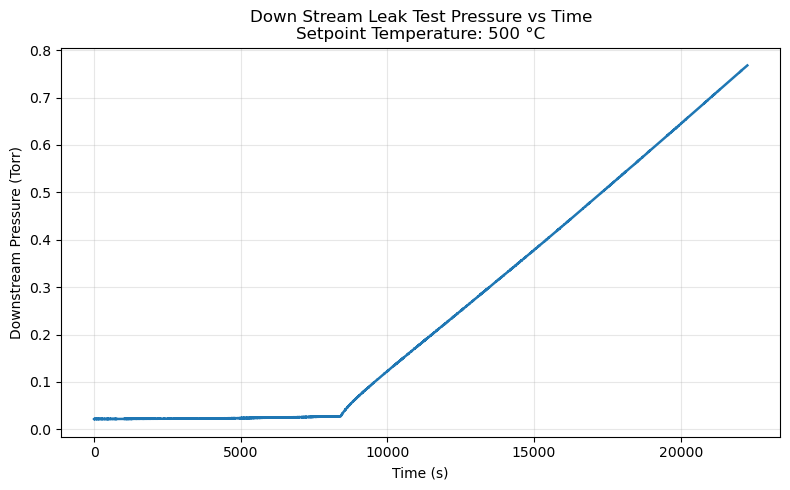

In [16]:
# --- Plot Baratron downstream pressure vs time ---
plt.figure(figsize=(8,5))
plt.plot(t - t_0, P_Baratron_downstream, linewidth=1.8)

plt.xlabel("Time (s)")
plt.ylabel("Downstream Pressure (Torr)")
plt.title("Down Stream Leak Test Pressure vs Time\nSetpoint Temperature: {} °C".format(temperature_C_set))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()